
如果使用表達能力偏弱的"線性"模型去學習，很難學習到比較好的模型;
如果使用"合適的多項式函數"模型去學習，則能學到比較合適的模型；
但模型過於復雜，表達能力過強時，則很有可能會過擬合，傷害模型的泛化能力。

我們可以給線性模型嵌套一個非線性函數 ex: 𝒉𝟏 = 𝑅𝑒𝐿𝑈(𝑾𝟏𝒙 + 𝒃𝟏)


下圖為例：
- 第一層:<br/>
輸入為(1,784)<br/>
進入第一層256個神經元 (會有256*784+256=200960個超參數)<br/>
輸出為(1,256)<br/>
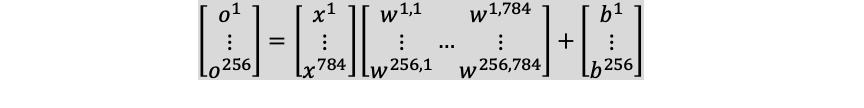

- 第二層:<br/>
輸入為(1,256)<br/>
進入第二層128個神經元 (會有128*256+128=32896個超參數)<br/>
輸出為(1,256)<br/>
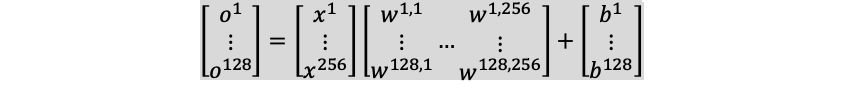

- 第三層:<br/>
輸入為(1,128)<br/>
進入第三層10個神經元 (會有10*128+10=1290個超參數)<br/>
輸出為(1,10)<br/>
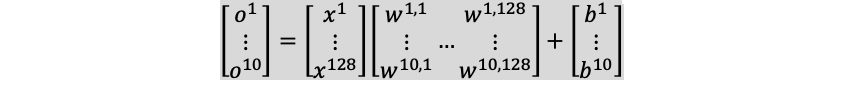

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, layers, datasets  # 导入 TF 子库
(x, y), (x_val, y_val) = datasets.mnist.load_data()  # 加载数据集
x = 2 * tf.convert_to_tensor(x, dtype=tf.float32) / 255. - 1  # 转换为张量，缩放到-1~1
y = tf.convert_to_tensor(y, dtype=tf.int32)  # 转换为张量
y = tf.one_hot(y, depth=10)  # one-hot编码

model = keras.Sequential([
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])
optimizer = optimizers.SGD(learning_rate=0.001)

def train(x, y):
  # 3个非线性层的嵌套模型
  with tf.GradientTape() as tape:
    # 构建梯度记录环境
    # 打平 [b, 28, 28] => [b, 784]
    x = tf.reshape(x, (-1, 28 * 28))
    # Step1. 得到模型输出 output （向前传播）
    # [b, 784] => [b, 10]
    out = model(x)
    # Step2. compute mse loss 
    loss = tf.reduce_sum(tf.square(out - y)) / x.shape[0]
    # Step3. 计算参数的梯度 w1, w2, w3, b1, b2, b3 （向後传播）
    # 求w和b對loss的偏導數，偏導數=要更新的距離
    grads = tape.gradient(loss, model.trainable_variables)
    # w' = w - lr * grad
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss
  

def run():
  train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
  # train_dataset = train_dataset.batch(200)
  print(len(train_dataset))
  for step, (data, label) in enumerate(train_dataset):
    loss=train(data, label)
    if step % 100 == 0:
      print(step, 'loss:', loss.numpy())

run()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-25 00:07:43.273046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-25 00:07:43.273168: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


60000
0 loss: 4.1934824
100 loss: 0.9770571
200 loss: 0.40771377
300 loss: 0.85818905
400 loss: 0.59759176
500 loss: 1.0110464
600 loss: 0.5104045
700 loss: 0.5813987
800 loss: 0.43081447
900 loss: 0.97124857
1000 loss: 0.60669297
1100 loss: 0.45698798
1200 loss: 0.17274158
1300 loss: 0.27591294
1400 loss: 0.2539913
1500 loss: 0.8804934
1600 loss: 0.77361465
1700 loss: 0.09343451
1800 loss: 0.828297
1900 loss: 0.2812431
2000 loss: 0.85776436
2100 loss: 0.118944556
2200 loss: 0.32119


KeyboardInterrupt: 

In [ ]:
import  os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import layers, optimizers, datasets




(x, y), (x_val, y_val) = datasets.mnist.load_data() 
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)
y = tf.one_hot(y, depth=10)
print(x.shape, y.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
train_dataset = train_dataset.batch(200)

 


model = keras.Sequential([ 
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)])

optimizer = optimizers.SGD(learning_rate=0.001)


def train_epoch(epoch):

    # Step4.loop
    for step, (x, y) in enumerate(train_dataset):


        with tf.GradientTape() as tape:
            # [b, 28, 28] => [b, 784]
            x = tf.reshape(x, (-1, 28*28))
            # Step1. compute output
            # [b, 784] => [b, 10]
            out = model(x)
            # Step2. compute loss
            loss = tf.reduce_sum(tf.square(out - y)) / x.shape[0]

        # Step3. optimize and update w1, w2, w3, b1, b2, b3
        grads = tape.gradient(loss, model.trainable_variables)
        # w' = w - lr * grad
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if step % 100 == 0:
            print(epoch, step, 'loss:', loss.numpy())



def train():

    for epoch in range(30):

        train_epoch(epoch)






if __name__ == '__main__':
    train()

(60000, 28, 28) (60000, 10)
0 0 loss: 2.8480268
0 100 loss: 0.9147239
0 200 loss: 0.7321076
1 0 loss: 0.6648815
1 100 loss: 0.66948944
1 200 loss: 0.5720736
2 0 loss: 0.54472214
2 100 loss: 0.58721876
2 200 loss: 0.50318164
3 0 loss: 0.48542327
3 100 loss: 0.5385115
3 200 loss: 0.46058214
4 0 loss: 0.447056
4 100 loss: 0.50438875
4 200 loss: 0.43056288
5 0 loss: 0.41900063
5 100 loss: 0.47773597
5 200 loss: 0.407251
6 0 loss: 0.39744583
6 100 loss: 0.45595267
6 200 loss: 0.38844588
7 0 loss: 0.3801155
7 100 loss: 0.43773386
7 200 loss: 0.37283728
8 0 loss: 0.36546516
8 100 loss: 0.4222714


KeyboardInterrupt: 